In [20]:
import ccxt
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import combinations

% matplotlib inline

In [47]:
exchange = ccxt.binance({
    'httpsProxy': 'http://127.0.0.1:7890',  # 设置代理
    'timeout': 30000,  # 请求超时时间（可选）
    'tld': 'us',  # Binance US 域名
    'rateLimit': 1200,
    'enableRateLimit': True,
})

# 目标加密货币交易对列表
cryptos = ['AAVE/USDT', 'DOT/USDT', 'DOGE/USDT', 'ARB/USDT', 'AVAX/USDT', 'LINK/USDT',
           'TON/USDT', 'SOL/USDT', 'DYDX/USDT', 'SUI/USDT', 'BNB/USDT', 'LTC/USDT',
           'ORDI/USDT', 'FET/USDT', 'TRX/USDT', 'UNI/USDT', '1000PEPE/USDT',
           '1000SHIB/USDT', 'ALGO/USDT', 'ETH/USDT', 'BTC/USDT', 'XMR/USDT',
           'OP/USDT', 'APT/USDT', 'KAS/USDT', 'ADA/USDT',
           'XRP/USDT', 'XLM/USDT', 'GALA/USDT']

# 目标加密货币交易对列表
# cryptos = ['LTC/USDT', 'XLM/USDT']

In [53]:

try:
    # 获取所有市场数据
    markets = exchange.load_markets()
    tickers = exchange.fetch_tickers()
    # 按成交量排序
    sorted_pairs = sorted(tickers.items(), key=lambda item: item[1].get('quoteVolume', 0), reverse=True)

    # 筛选出以 USDT 为参考货币的交易对
    usdt_pairs = [pair for pair in sorted_pairs if pair[0].endswith('/USDT')]
    # 获取成交量前 50 的以 USDT 为参考货币的交易对
    top_50_usdt_pairs = usdt_pairs[:50]

    top_50_usdt_symbols = [pair[0] for pair in top_50_usdt_pairs]
    print("以 USDT 为参考货币成交量前 50 的交易对的 symbol：", top_50_usdt_symbols)
except Exception as e:
    print(f"发生错误: {e}")


以 USDT 为参考货币成交量前 50 的交易对的 symbol： ['BTC/USDT', 'ETH/USDT', 'USDC/USDT', 'FDUSD/USDT', 'SOL/USDT', 'TRUMP/USDT', 'XRP/USDT', 'AUCTION/USDT', 'BNX/USDT', 'PNUT/USDT', 'BNB/USDT', 'W/USDT', 'TRX/USDT', 'PEPE/USDT', 'DOGE/USDT', 'ADA/USDT', 'SUI/USDT', 'WIF/USDT', 'S/USDT', 'API3/USDT', 'CAKE/USDT', 'BONK/USDT', 'FORM/USDT', 'LTC/USDT', 'ENA/USDT', 'ORCA/USDT', 'HBAR/USDT', 'AVAX/USDT', 'CRV/USDT', 'LINK/USDT', '1000SATS/USDT', 'AAVE/USDT', 'ZRO/USDT', 'DF/USDT', 'LAYER/USDT', 'BEAMX/USDT', 'ARKM/USDT', 'KAITO/USDT', 'OM/USDT', 'TAO/USDT', 'RUNE/USDT', 'ZK/USDT', 'NEIRO/USDT', 'WLD/USDT', 'EOS/USDT', 'ORDI/USDT', 'VANA/USDT', 'TIA/USDT', 'JUP/USDT', 'BMT/USDT']


In [54]:
cryptos = top_50_usdt_symbols

In [55]:
# 时间范围设置（例如，过去一年的数据）
since = exchange.parse8601('2024-01-01T00:00:00Z')  # 开始时间
timeframe = '1h'  # 时间间隔 (每日数据)

In [56]:
# 获取历史数据的函数
def fetch_ohlcv(symbol, since, timeframe):
    try:
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=since)
        df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        return df[['close']]  # 只保留收盘价
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

In [57]:
# 下载所有交易对的数据并合并
data_frames = {}
for crypto in cryptos:
    print(f"Fetching data for {crypto}...")
    df = fetch_ohlcv(crypto, since, timeframe)
    if df is not None:
        data_frames[crypto] = df.rename(columns={'close': crypto.split('/')[0]})
print('fetching data finished')

Fetching data for BTC/USDT...
Fetching data for ETH/USDT...
Fetching data for USDC/USDT...
Fetching data for FDUSD/USDT...
Fetching data for SOL/USDT...
Fetching data for TRUMP/USDT...
Fetching data for XRP/USDT...
Fetching data for AUCTION/USDT...
Fetching data for BNX/USDT...
Fetching data for PNUT/USDT...
Fetching data for BNB/USDT...
Fetching data for W/USDT...
Fetching data for TRX/USDT...
Fetching data for PEPE/USDT...
Fetching data for DOGE/USDT...
Fetching data for ADA/USDT...
Fetching data for SUI/USDT...
Fetching data for WIF/USDT...
Fetching data for S/USDT...
Fetching data for API3/USDT...
Fetching data for CAKE/USDT...
Fetching data for BONK/USDT...
Fetching data for FORM/USDT...
Fetching data for LTC/USDT...
Fetching data for ENA/USDT...
Fetching data for ORCA/USDT...
Fetching data for HBAR/USDT...
Fetching data for AVAX/USDT...
Fetching data for CRV/USDT...
Fetching data for LINK/USDT...
Fetching data for 1000SATS/USDT...
Fetching data for AAVE/USDT...
Fetching data for 

In [58]:
crypto_pairs = list(combinations(cryptos, 2))
crypto_pairs

[('BTC/USDT', 'ETH/USDT'),
 ('BTC/USDT', 'USDC/USDT'),
 ('BTC/USDT', 'FDUSD/USDT'),
 ('BTC/USDT', 'SOL/USDT'),
 ('BTC/USDT', 'TRUMP/USDT'),
 ('BTC/USDT', 'XRP/USDT'),
 ('BTC/USDT', 'AUCTION/USDT'),
 ('BTC/USDT', 'BNX/USDT'),
 ('BTC/USDT', 'PNUT/USDT'),
 ('BTC/USDT', 'BNB/USDT'),
 ('BTC/USDT', 'W/USDT'),
 ('BTC/USDT', 'TRX/USDT'),
 ('BTC/USDT', 'PEPE/USDT'),
 ('BTC/USDT', 'DOGE/USDT'),
 ('BTC/USDT', 'ADA/USDT'),
 ('BTC/USDT', 'SUI/USDT'),
 ('BTC/USDT', 'WIF/USDT'),
 ('BTC/USDT', 'S/USDT'),
 ('BTC/USDT', 'API3/USDT'),
 ('BTC/USDT', 'CAKE/USDT'),
 ('BTC/USDT', 'BONK/USDT'),
 ('BTC/USDT', 'FORM/USDT'),
 ('BTC/USDT', 'LTC/USDT'),
 ('BTC/USDT', 'ENA/USDT'),
 ('BTC/USDT', 'ORCA/USDT'),
 ('BTC/USDT', 'HBAR/USDT'),
 ('BTC/USDT', 'AVAX/USDT'),
 ('BTC/USDT', 'CRV/USDT'),
 ('BTC/USDT', 'LINK/USDT'),
 ('BTC/USDT', '1000SATS/USDT'),
 ('BTC/USDT', 'AAVE/USDT'),
 ('BTC/USDT', 'ZRO/USDT'),
 ('BTC/USDT', 'DF/USDT'),
 ('BTC/USDT', 'LAYER/USDT'),
 ('BTC/USDT', 'BEAMX/USDT'),
 ('BTC/USDT', 'ARKM/USDT'),
 (

In [59]:
data_frames

{'BTC/USDT':                           BTC
 timestamp                    
 2024-01-01 00:00:00  42475.23
 2024-01-01 01:00:00  42613.56
 2024-01-01 02:00:00  42581.10
 2024-01-01 03:00:00  42330.49
 2024-01-01 04:00:00  42399.99
 ...                       ...
 2024-01-21 15:00:00  41656.28
 2024-01-21 16:00:00  41607.18
 2024-01-21 17:00:00  41678.00
 2024-01-21 18:00:00  41681.09
 2024-01-21 19:00:00  41719.40
 
 [500 rows x 1 columns],
 'ETH/USDT':                          ETH
 timestamp                   
 2024-01-01 00:00:00  2295.51
 2024-01-01 01:00:00  2303.72
 2024-01-01 02:00:00  2293.02
 2024-01-01 03:00:00  2273.81
 2024-01-01 04:00:00  2279.55
 ...                      ...
 2024-01-21 15:00:00  2468.01
 2024-01-21 16:00:00  2471.80
 2024-01-21 17:00:00  2474.52
 2024-01-21 18:00:00  2474.31
 2024-01-21 19:00:00  2474.26
 
 [500 rows x 1 columns],
 'USDC/USDT':                        USDC
 timestamp                  
 2024-01-01 00:00:00  1.0002
 2024-01-01 01:00:00  1.0004


In [60]:
from statsmodels.tsa.stattools import coint

results = []

for pair in crypto_pairs:
    sym1, sym2 = pair

    # Ensure both DataFrames exist in our dictionary
    if sym1 not in data_frames or sym2 not in data_frames:
        print(f"Data not found for one of these symbols: {sym1}, {sym2}")
        continue

    # Extract price series for each symbol

    df1 = pd.Series(data_frames[sym1].values.flatten())  # 将 NumPy 数组转换为 Series
    df2 = pd.Series(data_frames[sym2].values.flatten())  # 将 NumPy 数组转换为 Series

    # Combine into one DataFrame on the same dates (inner join), drop missing values
    combined = pd.concat([df1, df2], axis=1, join="inner").dropna()
    combined.columns = ["Price1", "Price2"]

    # If there's not enough data after alignment, skip
    if len(combined) < 10:
        continue

    # Run Engle-Granger cointegration test
    coint_t, p_value, critical_values = coint(combined["Price1"], combined["Price2"])

    # Check if p-value < 0.05 for significance
    is_significant = (p_value < 0.05)

    # Store results
    results.append({
        "Symbol1": sym1,
        "Symbol2": sym2,
        "Test Statistic": coint_t,
        "p-value": p_value,
        "5% Critical Value": critical_values[0],  # 1%, 5%, 10% in array
        "Is_Cointegrated_5pct": is_significant
    })

for res in results:
    status = "Cointegrated" if res["Is_Cointegrated_5pct"] else "Not Cointegrated"
    print(
        f"{res['Symbol1']} & {res['Symbol2']} | "
        f"Test Statistic: {res['Test Statistic']:.3f} | "
        f"p-value: {res['p-value']:.3f} | "
        f"5% Crit. Value: {res['5% Critical Value']:.3f} | "
        f"Result: {status}"
    )

BTC/USDT & ETH/USDT | Test Statistic: -1.967 | p-value: 0.546 | 5% Crit. Value: -3.919 | Result: Not Cointegrated
BTC/USDT & USDC/USDT | Test Statistic: -2.306 | p-value: 0.370 | 5% Crit. Value: -3.919 | Result: Not Cointegrated
BTC/USDT & FDUSD/USDT | Test Statistic: -3.049 | p-value: 0.099 | 5% Crit. Value: -3.919 | Result: Not Cointegrated
BTC/USDT & SOL/USDT | Test Statistic: -1.659 | p-value: 0.695 | 5% Crit. Value: -3.919 | Result: Not Cointegrated
BTC/USDT & TRUMP/USDT | Test Statistic: -2.271 | p-value: 0.388 | 5% Crit. Value: -3.919 | Result: Not Cointegrated
BTC/USDT & XRP/USDT | Test Statistic: -1.847 | p-value: 0.606 | 5% Crit. Value: -3.919 | Result: Not Cointegrated
BTC/USDT & AUCTION/USDT | Test Statistic: -1.973 | p-value: 0.543 | 5% Crit. Value: -3.919 | Result: Not Cointegrated
BTC/USDT & BNX/USDT | Test Statistic: -2.278 | p-value: 0.385 | 5% Crit. Value: -3.919 | Result: Not Cointegrated
BTC/USDT & PNUT/USDT | Test Statistic: -1.880 | p-value: 0.590 | 5% Crit. Value

In [61]:
#Convert Cointegration Test Result to Dataframe
results_df = pd.DataFrame(results)
results_df

,Symbol1,Symbol2,Test Statistic,p-value,5% Critical Value,Is_Cointegrated_5pct
0,BTC/USDT,ETH/USDT,-1.966656,5.458612e-01,-3.918522,False
1,BTC/USDT,USDC/USDT,-2.306389,3.703691e-01,-3.918522,False
2,BTC/USDT,FDUSD/USDT,-3.049102,9.898997e-02,-3.918522,False
3,BTC/USDT,SOL/USDT,-1.659453,6.951564e-01,-3.918522,False
4,BTC/USDT,TRUMP/USDT,-2.270717,3.882523e-01,-3.918522,False
...,...,...,...,...,...,...
1220,VANA/USDT,JUP/USDT,-7.032628,7.175137e-09,-3.918522,True
1221,VANA/USDT,BMT/USDT,-1.689038,6.818927e-01,-3.981333,False
1222,TIA/USDT,JUP/USDT,-2.736677,1.866656e-01,-3.918522,False
1223,TIA/USDT,BMT/USDT,-2.246557,4.005008e-01,-3.981333,False


In [62]:
# Filter for rows where Is_Cointegrated_5pct is True
filtered_df = results_df[results_df['Is_Cointegrated_5pct'] == True]

# Create a new list of only the cointegrated pairs
cointegrated_pairs = [
    (row['Symbol1'], row['Symbol2'])
    for _, row in filtered_df.iterrows()
]

print("Cointegrated Pairs (5% level):")
for cp in cointegrated_pairs:
    print(cp)
print('Cointegrated size:', len(cointegrated_pairs))

Cointegrated Pairs (5% level):
('USDC/USDT', 'TRUMP/USDT')
('USDC/USDT', 'ORCA/USDT')
('SOL/USDT', 'TRUMP/USDT')
('SOL/USDT', 'S/USDT')
('SOL/USDT', 'CAKE/USDT')
('SOL/USDT', 'HBAR/USDT')
('SOL/USDT', '1000SATS/USDT')
('SOL/USDT', 'TAO/USDT')
('SOL/USDT', 'ZK/USDT')
('SOL/USDT', 'WLD/USDT')
('SOL/USDT', 'ORDI/USDT')
('SOL/USDT', 'JUP/USDT')
('TRUMP/USDT', 'XRP/USDT')
('TRUMP/USDT', 'HBAR/USDT')
('TRUMP/USDT', '1000SATS/USDT')
('TRUMP/USDT', 'DF/USDT')
('TRUMP/USDT', 'RUNE/USDT')
('XRP/USDT', 'PEPE/USDT')
('XRP/USDT', 'HBAR/USDT')
('XRP/USDT', 'AVAX/USDT')
('XRP/USDT', 'AAVE/USDT')
('XRP/USDT', 'BMT/USDT')
('AUCTION/USDT', 'LAYER/USDT')
('BNX/USDT', 'ENA/USDT')
('BNX/USDT', 'LAYER/USDT')
('BNX/USDT', 'BMT/USDT')
('PNUT/USDT', 'TRX/USDT')
('PNUT/USDT', 'SUI/USDT')
('PNUT/USDT', 'LTC/USDT')
('PNUT/USDT', 'LINK/USDT')
('PNUT/USDT', 'KAITO/USDT')
('BNB/USDT', 'FORM/USDT')
('BNB/USDT', 'ENA/USDT')
('BNB/USDT', 'LAYER/USDT')
('BNB/USDT', 'KAITO/USDT')
('W/USDT', 'HBAR/USDT')
('W/USDT', 'ZRO/U

In [63]:
def analyze_pair(data_dict, sym1, sym2):
    # Extract & align data
    priceX = pd.Series(data_dict[sym1].values.flatten()).rename("X")  # 将 NumPy 数组转换为 Series
    priceY = pd.Series(data_dict[sym2].values.flatten()).rename("Y")  # 将 NumPy 数组转换为 Series
    df = pd.concat([priceX, priceY], axis=1, join="inner").dropna()

    # If insufficient data remains, exit
    if len(df) < 10:
        print(f"Not enough overlapping data for {sym1} & {sym2}. Exiting.")
        return None

    # Prepare & fit OLS model
    X = sm.add_constant(df["X"])
    Y = df["Y"]
    model = sm.OLS(Y, X).fit()

    # Compute predictions & spread
    df["Y_pred"] = model.predict(X)
    df["Spread"] = df["Y"] - df["Y_pred"]

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df["Y"], label=f"{sym2} (Actual)")
    plt.plot(df.index, df["Y_pred"], label=f"{sym2} (Predicted from {sym1})")
    plt.title(f"Pair: {sym1} (X) → {sym2} (Y)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["Spread"], label="Spread (Y - Y_pred)")
    plt.axhline(df["Spread"].mean(), color='red', linestyle='--', label="Spread Mean")
    plt.title(f"Spread for {sym1} & {sym2}")
    plt.legend()
    plt.show()

    results_dict = {
        "model_params": model.params,  # alpha (const) and beta
        "df": df,  # the aligned dataframe with Spread
        "summary": model.summary()  # statsmodels summary object
    }
    return results_dict

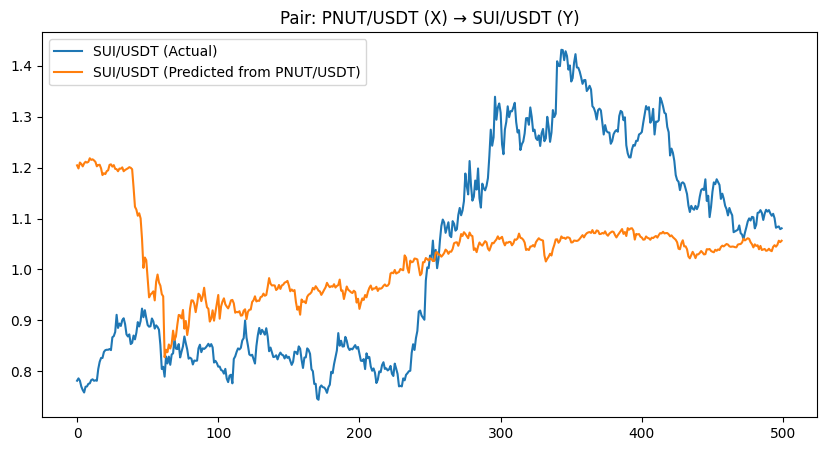

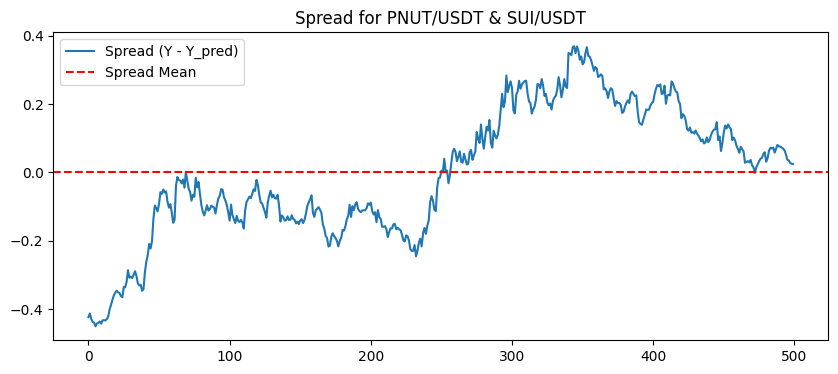

In [75]:
sym1 = 'PNUT/USDT'
sym2 = 'SUI/USDT'
pair_results = analyze_pair(data_frames, sym1, sym2)

In [76]:
def convert_zscore(df, sym1, sym2, window_size=10):
    #Compute rolling mean, rolling std, and Z-score
    df["Spread_MA"] = df["Spread"].rolling(window_size).mean()
    df["Spread_STD"] = df["Spread"].rolling(window_size).std()
    df["Zscore"] = (df["Spread"] - df["Spread_MA"]) / df["Spread_STD"]

    # Visualize the Z-score
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["Zscore"], label="Z-Score of Spread")
    plt.axhline(0, color="black", linestyle="--", lw=1)
    plt.axhline(2.0, color="green", linestyle="--", lw=1, label="+2 Z")
    plt.axhline(1.0, color="green", linestyle="--", lw=1, label="+1 Z")
    plt.axhline(-1.0, color="red", linestyle="--", lw=1, label="-1 Z")
    plt.axhline(-2.0, color="red", linestyle="--", lw=1, label="-2 Z")
    plt.title(f"Z-Score of Spread (Window={window_size}): {sym1}, {sym2}")
    plt.legend()
    plt.show()

    return df

In [77]:
pair_results_df = pair_results['df']

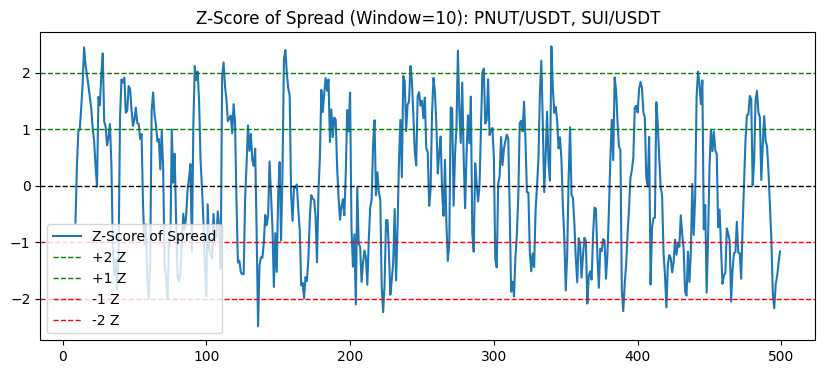

In [78]:
df_zscore = convert_zscore(pair_results_df, sym1, sym2, window_size=10)

In [79]:
import numpy as np


def run_pair_trading(sym1, sym2, data_dict, df_zscore, window_size=10, initial_equity=100_000.0):
    # 1) Align close prices
    df1 = pd.Series(data_frames[sym1].values.flatten()).rename("X")  # 将 NumPy 数组转换为 Series
    df2 = pd.Series(data_frames[sym2].values.flatten()).rename("Y")  # 将 NumPy 数组转换为 Series
    df = pd.concat([df1, df2], axis=1, join="inner").dropna().sort_index()

    if len(df) < window_size:
        return {
            "df": None,
            "metrics": f"Not enough data for {sym1}-{sym2}",
            "trades_df": pd.DataFrame()
        }

    df = df.join(df_zscore, how="inner", rsuffix="_zscore")

    if "Zscore" not in df or df["Zscore"].isna().all():
        return {
            "df": None,
            "metrics": f"Missing or invalid Zscore data for {sym1}-{sym2}",
            "trades_df": pd.DataFrame()
        }

    # 2) Determine positions on each pair
    df["x_position"] = np.nan
    df["y_position"] = np.nan

    # zscore > 2 => Short X, Long Y
    df.loc[df["Zscore"] > 2, ["x_position", "y_position"]] = [-1, 1]

    # -1 < zscore < 1 => Exit
    df.loc[(df["Zscore"] > -1) & (df["Zscore"] < 1), ["x_position", "y_position"]] = [0, 0]

    # zscore < -2 => Long X, Short Y
    df.loc[df["Zscore"] < -2, ["x_position", "y_position"]] = [1, -1]

    # Forward-fill positions in between signals
    df["x_position"] = df["x_position"].ffill().fillna(0)
    df["y_position"] = df["y_position"].ffill().fillna(0)

    # 3) Calculate daily returns from each pair
    df["x_return"] = df["X"].pct_change().fillna(0.0)
    df["y_return"] = df["Y"].pct_change().fillna(0.0)

    # Equity Allocation
    df["x_notional"] = 0.02 * initial_equity
    df["y_notional"] = 0.02 * initial_equity

    # Daily PnL for each pair
    df["daily_pnl_x"] = df["x_position"].shift(1) * df["x_notional"] * df["x_return"]
    df["daily_pnl_y"] = df["y_position"].shift(1) * df["y_notional"] * df["y_return"]
    df[["daily_pnl_x", "daily_pnl_y"]] = df[["daily_pnl_x", "daily_pnl_y"]].fillna(0.0)

    df["daily_pnl"] = df["daily_pnl_x"] + df["daily_pnl_y"]
    df["equity"] = initial_equity + df["daily_pnl"].cumsum()

    # 4) Performance metrics
    final_equity = df["equity"].iloc[-1]
    total_return_pct = round((final_equity - initial_equity) / initial_equity*100,2)

    df["equity_return"] = df["equity"].pct_change().fillna(0.0)
    ann_factor = 252
    mean_daily_ret = df["equity_return"].mean()
    std_daily_ret = df["equity_return"].std()

    if std_daily_ret != 0:
        sharpe_ratio = (mean_daily_ret / std_daily_ret) * np.sqrt(ann_factor)
    else:
        sharpe_ratio = np.nan

    neg_returns = df.loc[df["equity_return"] < 0, "equity_return"]
    std_downside = neg_returns.std() if not neg_returns.empty else np.nan
    if std_downside and std_downside != 0:
        sortino_ratio = (mean_daily_ret / std_downside) * np.sqrt(ann_factor)
    else:
        sortino_ratio = np.nan

    df["running_max"] = df["equity"].cummax()
    df["drawdown"] = (df["equity"] / df["running_max"]) - 1
    max_drawdown = df["drawdown"].min()

    # 5) Trade-by-trade details
    df["trade_signal"] = (df["x_position"].diff().abs() > 0) | (df["y_position"].diff().abs() > 0)
    trades = df[df["trade_signal"]].copy()
    trades["entry_date"] = trades.index
    trades["exit_date"] = trades["entry_date"].shift(-1)
    trades["pnl"] = trades["daily_pnl"]
    trades["x_position"] = trades["x_position"]
    trades["y_position"] = trades["y_position"]

    trades_df = trades[["entry_date", "exit_date", "x_position", "y_position", "pnl"]]
    num_trades = len(trades_df)
    win_rate = (trades_df[trades_df["pnl"] > 0].shape[0] / num_trades) if num_trades > 0 else np.nan

    metrics = {
        "sym1": sym1,
        "sym2": sym2,
        "final_equity": final_equity,
        "total_return_pct": total_return_pct,
        "sharpe_ratio": sharpe_ratio,
        "sortino_ratio": sortino_ratio,
        "max_drawdown_pct": max_drawdown,
        "num_trades": num_trades,
        "win_rate_pct": 100.0 * win_rate if not np.isnan(win_rate) else np.nan
    }

    return {
        "df": df,
        "metrics": metrics,
        "trades_df": trades_df
    }

In [80]:
# positive_results = []
# for sym1, sym2 in cointegrated_pairs:
#     # Call run_pair_trading for each pair
#     pair_trading_result = run_pair_trading(sym1, sym2, data_frames, df_zscore)
#
#     # Optionally store the results
#     results.append(pair_trading_result)
#
#     if(isinstance(pair_trading_result["metrics"], dict) and
#         "total_return_pct" in pair_trading_result["metrics"] and
#         pair_trading_result["metrics"]["total_return_pct"] > 0):
#             positive_results.append(pair_trading_result)


In [81]:
# for result in positive_results:
#     sym1 = result["metrics"]["sym1"]
#     sym2 = result["metrics"]["sym2"]
#     return_pct = result["metrics"]["total_return_pct"]
#     print(f"Pair {sym1}-{sym2}: Total Return = {return_pct:.2%}")

In [82]:
pair_trading = run_pair_trading(sym1, sym2, data_frames, df_zscore)
pair_trading['metrics']

{'sym1': 'PNUT/USDT',
 'sym2': 'SUI/USDT',
 'final_equity': np.float64(100620.46047566271),
 'total_return_pct': np.float64(0.62),
 'sharpe_ratio': np.float64(0.4313960523087114),
 'sortino_ratio': np.float64(0.3325564414413203),
 'max_drawdown_pct': np.float64(-0.004339163357924725),
 'num_trades': 41,
 'win_rate_pct': 24.390243902439025}

In [72]:
def plot_return(df):
    # Calculate cumulative return in percentage
    initial_equity = df["equity"].iloc[0]
    df["cumulative_return_pct"] = ((df["equity"] - initial_equity) / initial_equity) * 100

    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df["cumulative_return_pct"], label="Cumulative Return (%)", color="green", alpha=0.8)
    plt.title("Cumulative Return in Percentage")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return (%)")
    plt.legend()
    plt.grid()
    plt.show()

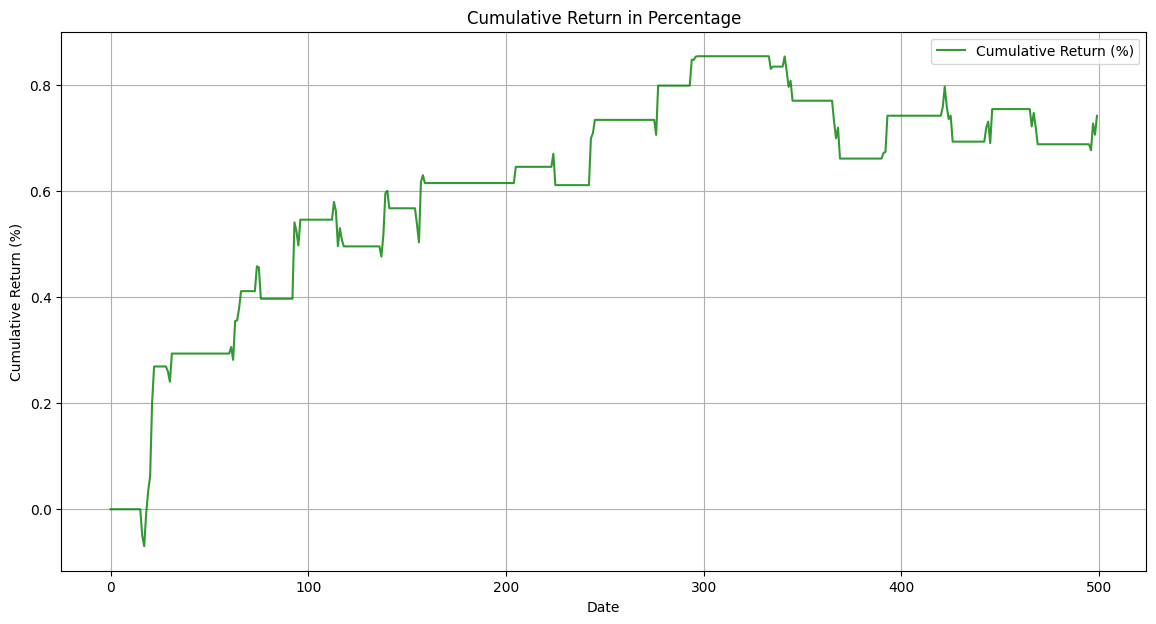

In [73]:
plot_return(pair_trading['df'])